<a href="https://colab.research.google.com/github/VictorRegueira/VARR_Bourbaki/blob/main/WorkingAnalyst/Mod1/VARR_WorkingAnalyst_Mod1_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working Analyst Módulo I: clasificación
- **Nombre:** Víctor Alejnadro Regueira Romero

# Paso 1. Carga de los datos



## Importar librerías

In [6]:
import numpy as np   # Biblioteca para manejar matrices y operaciones de matrices
import pandas as pd  # Biblioteca para manejar tablas de datos.

# Sklearn (Scikit-learn) es la  principal biblioteca para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Bibliotecas para gráficar y visualizar.
import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [7]:
def describe_datos(df):
    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat([df.dtypes, df.isna().sum(),df.nunique(),unicos], axis=1)
    descripcion.columns = ['dtypes', 'null','nunique','unique' ]
    return(descripcion)

## Cargando archivo raw

In [8]:
# !wget https://github.com/VictorRegueira/VARR_Bourbaki/raw/main/WorkingAnalyst/Mod1/FraudeCanastas.zip
# !unzip FraudeCanastas.zip

--2025-02-25 01:33:29--  https://github.com/VictorRegueira/VARR_Bourbaki/raw/main/WorkingAnalyst/Mod1/FraudeCanastas.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/VictorRegueira/VARR_Bourbaki/main/WorkingAnalyst/Mod1/FraudeCanastas.zip [following]
--2025-02-25 01:33:29--  https://raw.githubusercontent.com/VictorRegueira/VARR_Bourbaki/main/WorkingAnalyst/Mod1/FraudeCanastas.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375550 (367K) [application/zip]
Saving to: ‘FraudeCanastas.zip’

FraudeCanastas.zip  100%[===================>] 366.75K  --.-KB/s    in 0.05s   

2025-02-25 01:33:30 (7

In [9]:
df_raw = pd.read_csv('/content/FraudeCanastas.csv')
df_raw.shape

(9319, 2457)

In [10]:
df_raw.head(10)

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0
5,855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8,9,1263,140.333333,280,4.0,1.0
6,856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,942,471.000000,938,4.0,1.0
7,941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1199,599.500000,1199,0.0,1.0
8,1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
9,1543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,936,468.000000,929,7.0,1.0


# Paso 2. EDA

## Arreglando los tipos de datos de las columnas

In [11]:
# Function to get unique counts or total length for numerical columns
def unique_or_len(series):
    return series.nunique()

# Create the summary DataFrame
df_summary = pd.DataFrame({
    'Column': df_raw.columns,
    'Total_Unique_Values': [unique_or_len(df_raw[col]) for col in df_raw.columns],
    'Type': df_raw.dtypes
})

df_summary.reset_index(drop=True, inplace=True)

In [12]:
df_summary.sort_values(by='Total_Unique_Values', ascending=False).head(10)

,Column,Total_Unique_Values,Type
0,ID,9319,int64
2453,costo_medio_item,2034,float64
2452,costo_total,1639,int64
2454,costo_item_max,540,int64
2455,costo_item_min,528,float64
1424,LIVING & DINING FURNITURE | RETAILER | RETAILER,62,float64
2451,total_of_items,34,int64
2450,Nb_of_items,28,int64
879,COMPUTERS | APPLE | 2020 APPLE IPAD AIR 10 9 A...,26,float64
729,COMPUTER PERIPHERALS & ACCESSORIES | APPLE | A...,25,float64


In [13]:
print(df_summary[df_summary['Total_Unique_Values'] > 2].count())

Column                 525
Total_Unique_Values    525
Type                   525
dtype: int64


In [14]:
df_summary[df_summary['Total_Unique_Values'] > 2].sort_values(by='Total_Unique_Values', ascending=False).head(15)

,Column,Total_Unique_Values,Type
0,ID,9319,int64
2453,costo_medio_item,2034,float64
2452,costo_total,1639,int64
2454,costo_item_max,540,int64
2455,costo_item_min,528,float64
1424,LIVING & DINING FURNITURE | RETAILER | RETAILER,62,float64
2451,total_of_items,34,int64
2450,Nb_of_items,28,int64
879,COMPUTERS | APPLE | 2020 APPLE IPAD AIR 10 9 A...,26,float64
729,COMPUTER PERIPHERALS & ACCESSORIES | APPLE | A...,25,float64


In [15]:
df_summary[df_summary['Total_Unique_Values'] == 2].sort_values(by='Total_Unique_Values', ascending=False)

,Column,Total_Unique_Values,Type
1,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,2,float64
1678,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1632,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1631,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1628,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
...,...,...,...
828,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
827,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
826,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
825,COMPUTER PERIPHERALS ACCESSORIES | HP | HP M24...,2,float64


In [16]:
describe_datos(df_raw)

,dtypes,null,nunique,unique
ID,int64,0,9319,"[130, 195, 217, 552, 854, 855, 856, 941, 1157,..."
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,float64,0,2,"[0.0, 1000.0]"
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,float64,0,2,"[0.0, 20.0]"
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,float64,0,8,"[0.0, 125.0, 119.0, 120.0, 500.0, 129.0, 109.0..."
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,float64,0,8,"[0.0, 109.0, 100.0, 105.0, 104.0, 99.0, 119.0,..."
...,...,...,...,...
costo_total,int64,0,1639,"[1299, 4119, 2806, 1206, 1807, 1263, 942, 1199..."
costo_medio_item,float64,0,2034,"[649.5, 1373.0, 1403.0, 603.0, 66.925925925925..."
costo_item_max,int64,0,540,"[1299, 2470, 2799, 1199, 195, 280, 938, 929, 1..."
costo_item_min,float64,0,528,"[0.0, 7.0, 4.0, 1249.0, 25.0, 2470.0, 999.0, 1..."


In [17]:
df_raw['LIVING & DINING FURNITURE | RETAILER | RETAILER'].value_counts()

,count
LIVING & DINING FURNITURE | RETAILER | RETAILER,
0.0,9241
1499.0,4
899.0,3
2050.0,3
3198.0,2
...,...
898.0,1
882.0,1
1828.0,1


## Obervaciones:

- 525 de las columnas tienen valores superiores a 2 valores
- Los valores son flotantes o enteros
- Hay 6 variables que muestran estadísticas de costos e items

In [18]:
# Nb_of_items
# total_of_items
# costo_total
# costo_medio_item
# costo_item_max
# costo_item_min


# for col in df_raw.columns:
#   col_lower = col.lower()
#   if 'costo' not in col_lower or 'Nb_of_items' not in col_lower or 'total_of_items' not in col_lower :
#     df_raw[col] = df_raw[col].astype('object')

# Paso 3. Construcción de nuestro clasificador

## Crear conjunto de características y variable objetivo

In [19]:
df_raw['fraud_flag'].value_counts(sort=False, normalize=True)

,proportion
fraud_flag,
1.0,0.141539
0.0,0.858461


Hallazgo: Se encuentra desbalanceado la variable objetivo.

In [20]:
X = df_raw.drop('fraud_flag', axis=1)
y = df_raw['fraud_flag']

## Crear subconjuntos de entrenamiento y prueba

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [22]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("--------------------------")

print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Not fraud: ', counts[0],'\nFraud: ', counts[1])

print("\nTest set")
print("--------------------------")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Not fraud: ', counts[0],'\nFraud: ', counts[1],'\n')

Training set
--------------------------
X:  (7455, 2456)
y:  (7455,)
Not fraud:  6403 
Fraud:  1052

Test set
--------------------------
X:  (1864, 2456)
y:  (1864,)
Not fraud:  1597 
Fraud:  267 



## Entrenamiento modelo base

In [23]:
model = Perceptron(max_iter=1000, random_state=15, verbose=False)
model.fit(X_train, y_train)

print("Iterations: ", model.n_iter_)

Iterations:  14


In [24]:
print("Exactitud conjunto entrenamiento: %.2f%%" % (model.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model.score(X_test,
                                                          y_test)*100.0))

Exactitud conjunto entrenamiento: 85.82%
Exactitud conjunto prueba: 85.68%


## Predicción modelo base

In [25]:
y_predict = model.predict(X_test)

In [26]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }
df = pd.DataFrame(data)

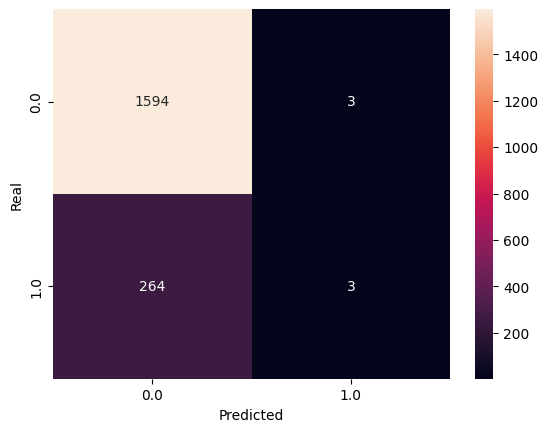

In [27]:
# Matriz de confusión

confusion_matrix = pd.crosstab(df['Y_Real'],
                               df['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Predicted'])
confusion_matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001],
    'max_iter': [1000, 1500],
    'shuffle':[True]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=Perceptron(random_state=15, verbose=False),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='roc_auc', #'accuracy' # Evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l1', 'shuffle': True}
Best Score: 0.588388608415163


- Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l1', 'shuffle': True}
- Best Score: 0.588388608415163

## Select best model

In [32]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_

print("Exactitud conjunto entrenamiento: %.2f%%" % (best_model.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (best_model.score(X_test,
                                                          y_test)*100.0))

Exactitud conjunto entrenamiento: 85.81%
Exactitud conjunto prueba: 85.68%


In [33]:
best_model.get_params(deep=True)

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 15,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [35]:
import joblib

# Assuming 'best_model' is the trained model from your code
# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

# Paso 4: Construcción de clasificador final

## Cargamos el modelo guardado

In [37]:
clf = joblib.load('best_model.pkl')
clf.get_params(deep=True)

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 15,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [42]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

print("\nDetailed Cross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
      print(f"{metric}: {scores}")
      print(f"Mean {metric}: {np.mean(scores)}")
      print(f"Standard Deviation {metric}: {np.std(scores)}")




Detailed Cross-validation results:
test_accuracy: [0.8583691  0.82403433 0.85300429 0.84656652 0.84702093]
Mean test_accuracy: 0.8457990365808989
Standard Deviation test_accuracy: 0.0117107342227531
test_precision: [0.5        0.01515152 0.08333333 0.04166667 0.        ]
Mean test_precision: 0.12803030303030302
Standard Deviation test_precision: 0.18812300842628793
test_recall: [0.00378788 0.00378788 0.00378788 0.00378788 0.        ]
Mean test_recall: 0.0030303030303030303
Standard Deviation test_recall: 0.0015151515151515152
test_f1: [0.0075188  0.00606061 0.00724638 0.00694444 0.        ]
Mean test_f1: 0.005554044861825183
Standard Deviation test_f1: 0.002819981132481252
test_roc_auc: [0.86362689 0.67572206 0.54117187 0.32495502 0.15268298]
Mean test_roc_auc: 0.5116317674127203
Standard Deviation test_roc_auc: 0.25115383715343087


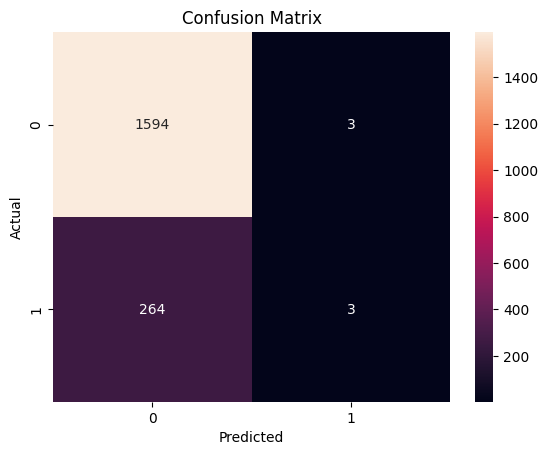

In [43]:
# Assuming 'best_model' is your trained model and 'X_test', 'y_test' are your test data.
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test) # Use the best_model for prediction

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print("Exactitud conjunto entrenamiento: %.2f%%" % (clf.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (clf.score(X_test,
                                                          y_test)*100.0))

Exactitud conjunto entrenamiento: 85.81%
Exactitud conjunto prueba: 85.68%
